### ♦ I am testing to see what variables affect a song's popularity for an independent music artist. They want to know what variables could positively impact the song's success. I will analyze the top 2,000 Spotify songs from 2000-2019. ♦




### Importing Modules

In [21]:
import numpy as np

import pandas as pd

from scipy import stats
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Importing my data from my Gdrive folder: Capstone III

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##  Read in the GDrive-mounted CSV

In [23]:
df = pd.read_csv('/content/gdrive/My Drive/Capstone III/spotify.csv')

df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### **This** data source was taken from : https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

In [24]:
df.shape


(2000, 18)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


### My two hypotheses are:
### H1: Does the duration of a song affect its popularity?
### H2: Are songs with a high BPM  more likely to be popular than those at a slower tempo?

--- A high BPM is considered anything higher than 110 BPM.



In [26]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [27]:
def series_statistics(column):
  print('statistics for column: {}'.format(column.name))
  print('The max value in the column: {}'.format(column.max()))
  print('The min value in the column: {}'.format(column.min()))
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
  print('The std of the column: {}'.format(column.std()))

In [28]:
df[['popularity', 'duration_ms', 'tempo']].describe()

,popularity,duration_ms,tempo
count,2000.000000,2000.000000,2000.000000
mean,59.872500,228748.124500,120.122558
std,21.335577,39136.569008,26.967112
min,0.000000,113000.000000,60.019000
25%,56.000000,203580.000000,98.985750
50%,65.500000,223279.500000,120.021500
75%,73.000000,248133.000000,134.265500
max,89.000000,484146.000000,210.851000


### H1: Does the duration of a song affect its popularity?




### Null Hypothesis: There is no correlation between a songs duration and popularity.

### Lets look at the stats of both columns separately

In [29]:
series_statistics(df['duration_ms'])


statistics for column: duration_ms
The max value in the column: 484146
The min value in the column: 113000
The mode value in the column: 0    212106
Name: duration_ms, dtype: int64
The median value in the column: 223279.5
The mean of the column: 228748.1245
The std of the column: 39136.56900752594


In [30]:
series_statistics(df['popularity'])

statistics for column: popularity
The max value in the column: 89
The min value in the column: 0
The mode value in the column: 0    0
Name: popularity, dtype: int64
The median value in the column: 65.5
The mean of the column: 59.8725
The std of the column: 21.33557702930921


###  What is the corralation between a songs duration and popularity?:

In [31]:
df['popularity'].corr(df['duration_ms'])

0.05061721936219038

###  Based on the information above, There is a tiny correlation between a song's duration and its popularity. I am going to test the statistical significance using the Pearson R test.


In [32]:
stats.pearsonr(df['popularity'], df['duration_ms'])

PearsonRResult(statistic=0.050617219362190366, pvalue=0.023592155631942422)

###  Based on the P-value results above :  There is a small positive statistical significance that a songs popularity is affected by the songs duration. The null hypotosis can be rejected!


### Let's visualize the data

In [33]:
df[['popularity', 'duration_ms', ]].describe()

,popularity,duration_ms
count,2000.000000,2000.000000
mean,59.872500,228748.124500
std,21.335577,39136.569008
min,0.000000,113000.000000
25%,56.000000,203580.000000
50%,65.500000,223279.500000
75%,73.000000,248133.000000
max,89.000000,484146.000000


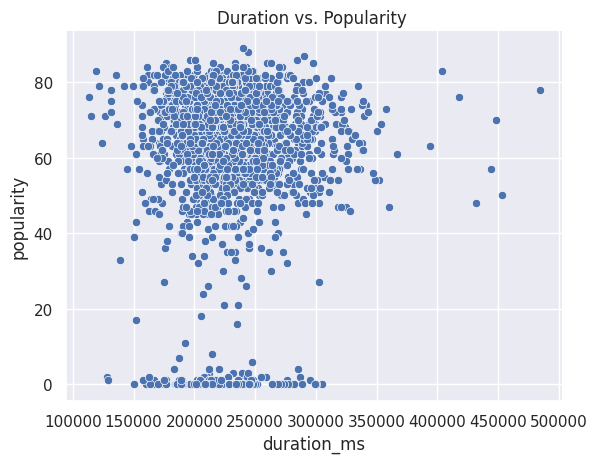

In [34]:
sns.scatterplot(x="duration_ms", y="popularity", data=df)
sns.despine()
plt.title('Duration vs. Popularity ')
plt.show()

### The graph above shows There is a small positive statistical significance that a songs popularity is affected by the songs duration. Most popular songs are between 20,000 - 25,000 Milli seconds or 3.33 - 4.16 minutes long. We can reject the null hypothesis.  

### H2: Are songs with a  higer BPM  more likely to be popular than those at a slower tempo?

### Null Hypothesis: The BPM has no affect on a songs popularity

### Lets look at the stats of both columns

In [35]:
df[['popularity', 'tempo', ]].describe()

,popularity,tempo
count,2000.000000,2000.000000
mean,59.872500,120.122558
std,21.335577,26.967112
min,0.000000,60.019000
25%,56.000000,98.985750
50%,65.500000,120.021500
75%,73.000000,134.265500
max,89.000000,210.851000


###  What is the corralation between a songs Tempo and popularity?:

In [36]:
df['popularity'].corr(df['tempo'])

0.014288465250509643

### Based on the information above there is no coralation between a songs  Tempo and a songs popularity. I am going to test the statistical significance using the Pearson R test.

In [37]:
stats.pearsonr(df['popularity'], df['tempo'])

PearsonRResult(statistic=0.01428846525050962, pvalue=0.5230619025020389)

### Based on the P-value results above : There isnt enough statistical evidence  that a songs popularity is affected by the songs Tempo. The null hypothesis will not be rejected.

### Let's visualize the data

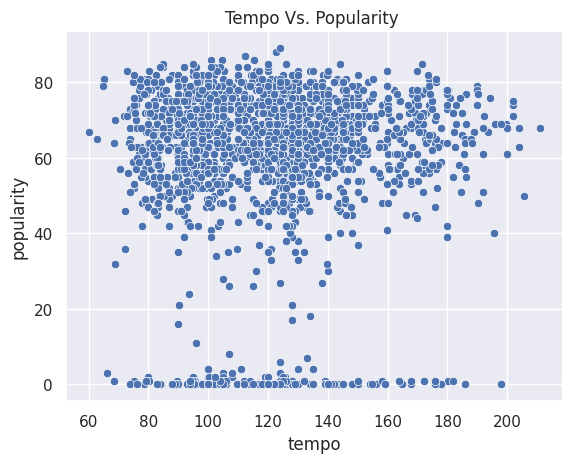

In [41]:
sns.scatterplot(x="tempo", y="popularity", data=df)
sns.despine()
plt.title('Tempo Vs. Popularity ')
plt.show()

### The graph above shows that the Null Hypotheses will be accepted. There is no statistical evidence that a higher BPM  will positively affect a song's popularity. However there does appear to be a trend that highly popular songs are between 100-140 BPM.

### In conclusion, we have found that a song has a better chance of being popular if it's not too long or short in duration. It should be just right! Most popular songs are 3 to 4 minutes long. Based on my calculations we also discovered that a song's BPM doesn't affect its popularity. But we did discover a trend that most songs are between 100-120 BPM. This information will help independent artists create music that will hold a listener’s attention. Other factors need to be tested to determine what makes listeners repeat a song. ✅